In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/COMPFESTNO2NEHPREDICTPOPULASI.csv")

df

,Tanggal,Tahun,Population,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia)
0,2016-01-01,2016,261850182,0,0,0,0,0,0,0,0
1,2016-01-02,2016,261850182,0,0,0,0,0,0,0,0
2,2016-01-03,2016,261850182,0,0,0,0,0,0,0,0
3,2016-01-04,2016,261850182,0,0,0,0,0,0,0,0
4,2016-01-05,2016,261850182,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2634,2023-05-17,2023,277534122,"6,799,760","16,558","6,621,556","161,646","1,024",5,"1,011",8
2635,2023-05-18,2023,277534122,"6,800,425","16,305","6,622,467","161,653",665,-253,911,7
2636,2023-05-20,2023,277534122,"6,801,615","15,707","6,624,237","161,671","6,801,615","15,707","6,624,237","161,671"
2637,2023-05-21,2023,277534122,"6,802,090","15,207","6,625,209","161,674",475,-500,972,3


In [ ]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

In [ ]:
# Extract day, month, and year components
df['Day'] = df['Tanggal'].dt.day
df['Month'] = df['Tanggal'].dt.month
df['Year'] = df['Tanggal'].dt.year

# Drop the original datetime column
df = df.drop('Tanggal', axis=1)

In [ ]:
for column in df.columns:
    if df[column].dtype == object:
      df[column] = df[column].str.replace(',', '').astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tahun                         2639 non-null   int64  
 1   Population                    2639 non-null   int64  
 2   Positif (Indonesia)           2639 non-null   float64
 3   Dirawat (Indonesia)           2639 non-null   float64
 4   Sembuh (Indonesia)            2639 non-null   float64
 5   Meninggal (Indonesia)         2639 non-null   float64
 6   Positif Harian (Indonesia)    2639 non-null   float64
 7   Dirawat Harian (Indonesia)    2639 non-null   float64
 8   Sembuh Harian (Indonesia)     2639 non-null   float64
 9   Meninggal Harian (Indonesia)  2639 non-null   float64
 10  Day                           2639 non-null   int64  
 11  Month                         2639 non-null   int64  
 12  Year                          2639 non-null   int64  
dtypes: 

<Axes: xlabel='Tahun', ylabel='Population'>

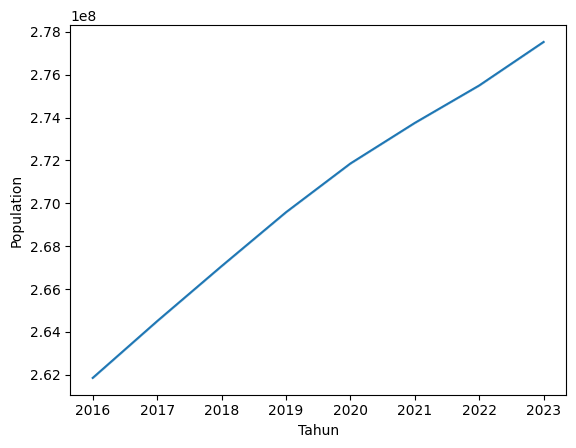

In [ ]:
sns.lineplot(y=df['Population'], x=df['Tahun'])

<Axes: xlabel='Tahun', ylabel='Positif (Indonesia)'>

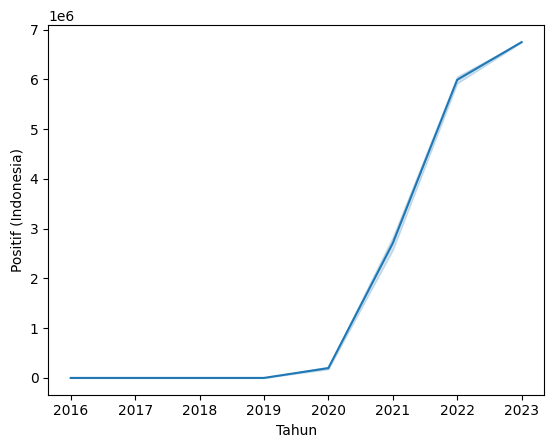

In [ ]:
sns.lineplot(data=df, y=df['Positif (Indonesia)'], x=df['Tahun'])

<Axes: xlabel='Tahun', ylabel='Meninggal (Indonesia)'>

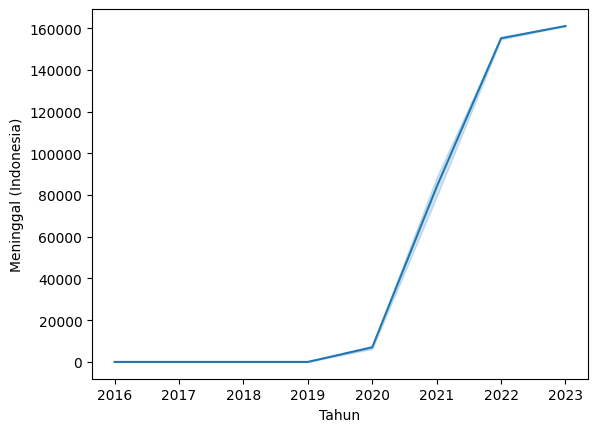

In [ ]:
sns.lineplot(x=df['Tahun'], y=df['Meninggal (Indonesia)'])

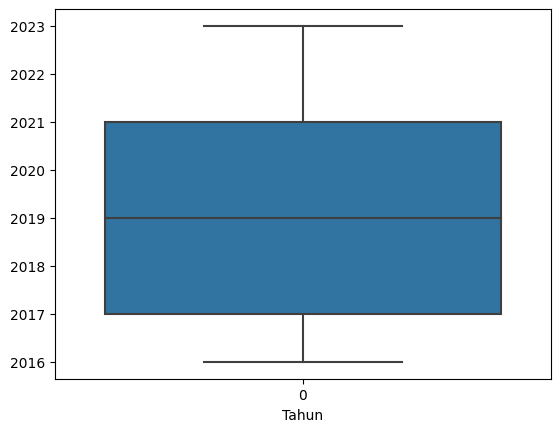

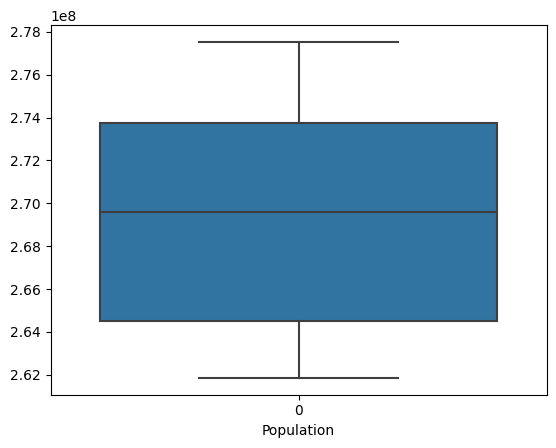

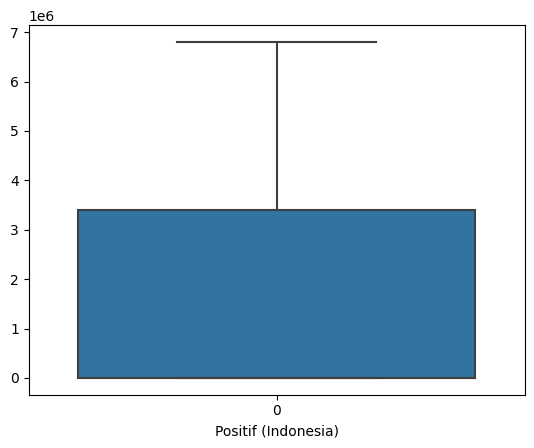

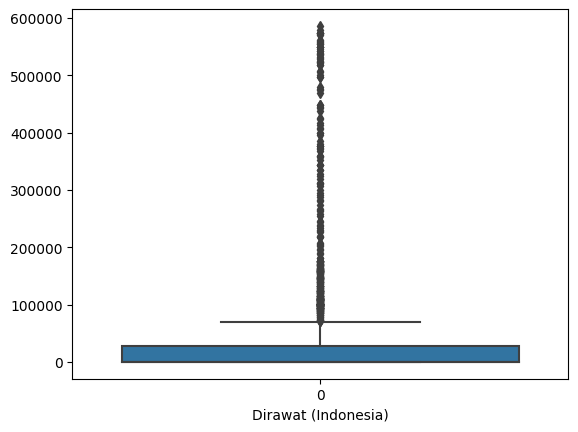

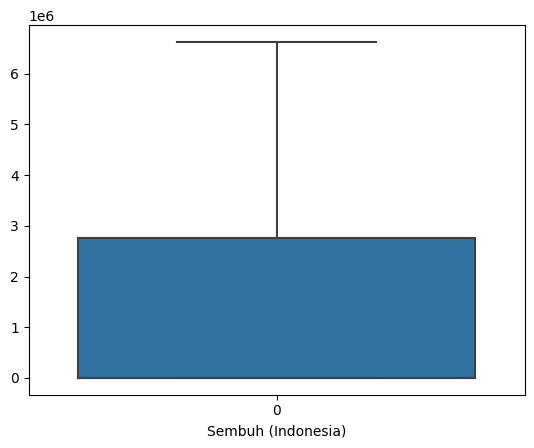

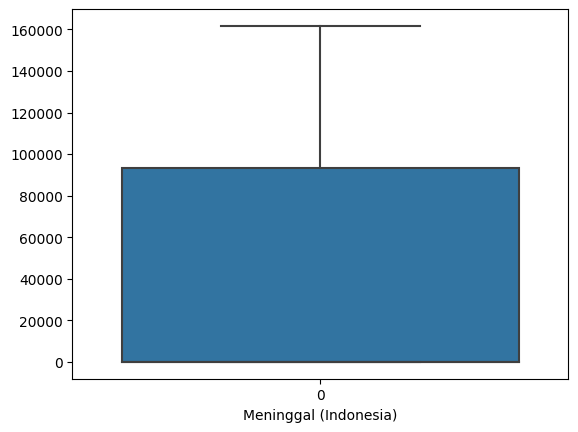

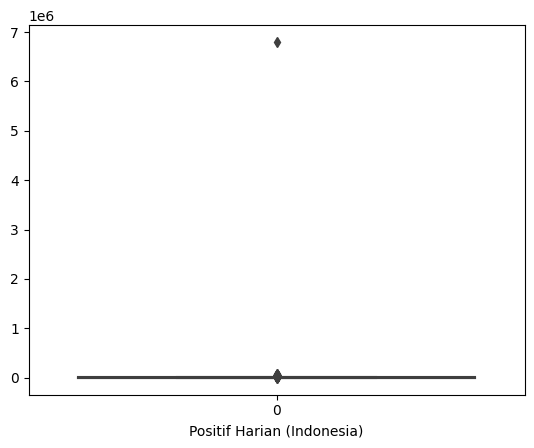

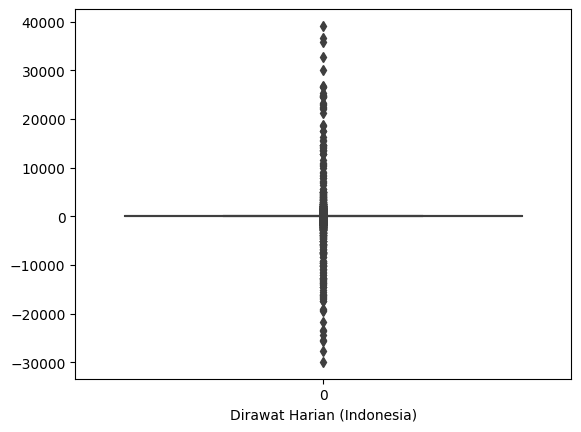

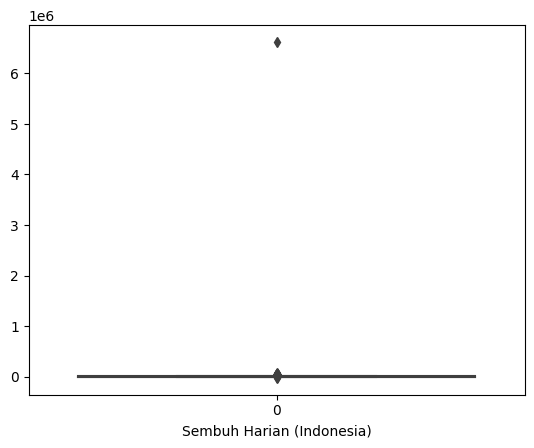

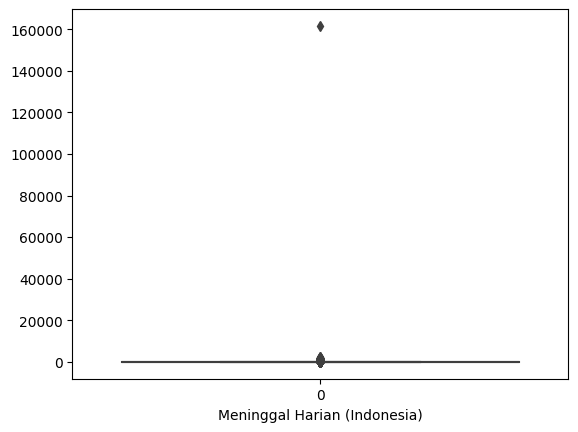

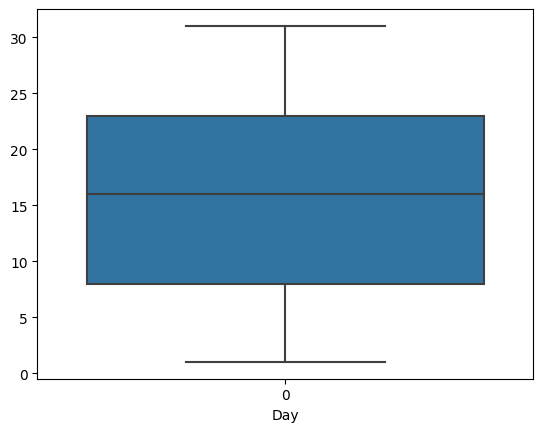

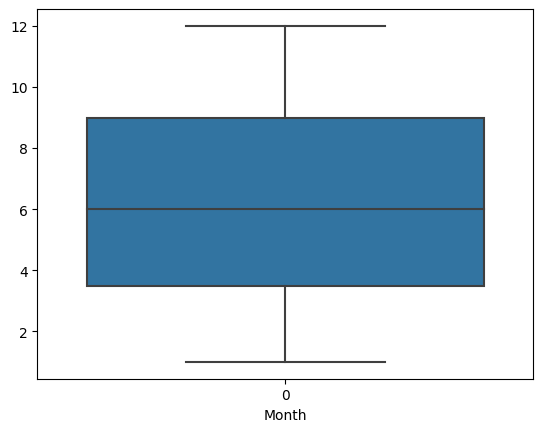

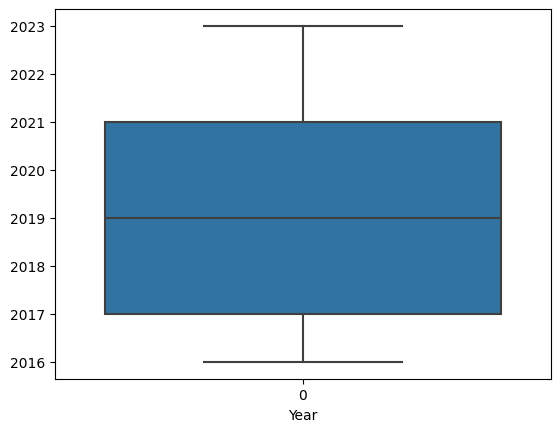

In [ ]:
for i in df.columns:
  sns.boxplot(df[i])
  plt.xlabel(i)
  plt.show()

In [ ]:
backupdata = df.copy()

In [ ]:
df.corr()

,Tahun,Population,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),Day,Month,Year
Tahun,1.000000,0.997045,0.816677,0.374881,0.810198,0.818031,0.053033,-0.000284,0.053238,0.050327,-0.023230,-0.051398,1.000000
Population,0.997045,1.000000,0.774514,0.374159,0.767605,0.778578,0.050320,0.000232,0.050489,0.048205,-0.020770,-0.045102,0.997045
Positif (Indonesia),0.816677,0.774514,1.000000,0.271651,0.999331,0.989669,0.054983,-0.065712,0.057166,0.050573,-0.006628,-0.013012,0.816677
Dirawat (Indonesia),0.374881,0.374159,0.271651,1.000000,0.236457,0.295269,0.046610,0.020425,0.046075,0.048527,-0.013809,-0.056052,0.374881
Sembuh (Indonesia),0.810198,0.767605,0.999331,0.236457,1.000000,0.987474,0.053858,-0.067124,0.056085,0.049326,-0.006254,-0.011389,0.810198
Meninggal (Indonesia),0.818031,0.778578,0.989669,0.295269,0.987474,1.000000,0.051286,-0.063665,0.053389,0.047312,-0.003515,-0.000749,0.818031
Positif Harian (Indonesia),0.053033,0.050320,0.054983,0.046610,0.053858,0.051286,1.000000,0.099157,0.999568,0.998964,0.008644,-0.011055,0.053033
Dirawat Harian (Indonesia),-0.000284,0.000232,-0.065712,0.020425,-0.067124,-0.063665,0.099157,1.000000,0.070519,0.072997,-0.012660,-0.031024,-0.000284
Sembuh Harian (Indonesia),0.053238,0.050489,0.057166,0.046075,0.056085,0.053389,0.999568,0.070519,1.000000,0.999252,0.009001,-0.010210,0.053238
Meninggal Harian (Indonesia),0.050327,0.048205,0.050573,0.048527,0.049326,0.047312,0.998964,0.072997,0.999252,1.000000,0.010228,-0.008019,0.050327


In [ ]:
df.columns

Index(['Tahun', 'Population', 'Positif (Indonesia)', 'Dirawat (Indonesia)',
       'Sembuh (Indonesia)', 'Meninggal (Indonesia)',
       'Positif Harian (Indonesia)', 'Dirawat Harian (Indonesia)',
       'Sembuh Harian (Indonesia)', 'Meninggal Harian (Indonesia)', 'Day',
       'Month', 'Year'],
      dtype='object')

In [ ]:
y = df['Population']
df = df.drop('Population', axis=1)
X = df

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

# 6. Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

# 7. Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

# 8. Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# 9. Gradient Boosting Regression (e.g., XGBoost, LightGBM, CatBoost)
# Note: You need to install the respective libraries (e.g., xgboost, lightgbm, catboost)
# and import the relevant regressor class to use them. Here's an example with XGBoost:
import xgboost as xgb
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

# 10. K-Nearest Neighbors (KNN) Regression
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)

# 13. AdaBoost Regression
ada_model = AdaBoostRegressor()
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)
ada_mse = mean_squared_error(y_test, ada_pred)
ada_mae = mean_absolute_error(y_test, ada_pred)
ada_r2 = r2_score(y_test, ada_pred)

# Print the evaluation metrics for each model
print("Linear Regression:")
print("  MSE:", lr_mse)
print("  MAE:", lr_mae)
print("  R^2:", lr_r2)

print("Support Vector Regression (SVR):")
print("  MSE:", svr_mse)
print("  MAE:", svr_mae)
print("  R^2:", svr_r2)

print("Decision Tree Regression:")
print("  MSE:", dt_mse)
print("  MAE:", dt_mae)
print("  R^2:", dt_r2)

print("Random Forest Regression:")
print("  MSE:", rf_mse)
print("  MAE:", rf_mae)
print("  R^2:", rf_r2)

print("Gradient Boosting Regression (XGBoost):")
print("  MSE:", xgb_mse)
print("  MAE:", xgb_mae)
print("  R^2:", xgb_r2)

print("K-Nearest Neighbors (KNN) Regression:")
print("  MSE:", knn_mse)
print("  MAE:", knn_mae)
print("  R^2:", knn_r2)

print("AdaBoost Regression:")
print("  MSE:", ada_mse)
print("  MAE:", ada_mae)
print("  R^2:", ada_r2)

Linear Regression:
  MSE: 21988966506.50105
  MAE: 119984.09487665241
  R^2: 0.9990554848326113
Support Vector Regression (SVR):
  MSE: 23282226960165.332
  MAE: 4121605.069838204
  R^2: -6.594161490047767e-05
Decision Tree Regression:
  MSE: 0.0
  MAE: 0.0
  R^2: 1.0
Random Forest Regression:
  MSE: 255826036.36694172
  MAE: 728.3950000000045
  R^2: 0.9999890112356353
Gradient Boosting Regression (XGBoost):
  MSE: 694.0511363636364
  MAE: 24.770833333333332
  R^2: 0.9999999999701877
K-Nearest Neighbors (KNN) Regression:
  MSE: 123277464169.69695
  MAE: 193556.1659090901
  R^2: 0.994704733636705
AdaBoost Regression:
  MSE: 0.0
  MAE: 0.0
  R^2: 1.0


Mean Squared Error (MSE): MSE measures the average squared difference between the predicted and actual values. It gives higher weight to larger errors. A lower MSE value indicates better model performance, with zero indicating a perfect fit. However, it is sensitive to outliers.

Mean Absolute Error (MAE): MAE calculates the average absolute difference between the predicted and actual values. It provides a more interpretable metric compared to MSE since it is in the original scale of the target variable. Similarly, a lower MAE value indicates better model performance, with zero indicating a perfect fit. It is less sensitive to outliers compared to MSE.

R^2 (Coefficient of Determination): R^2 represents the proportion of variance in the target variable that is predictable from the input features. It ranges from 0 to 1, with 1 indicating a perfect fit. Higher R^2 values suggest better model performance in explaining the target variable. However, R^2 can be artificially inflated for complex models and should be used in conjunction with other metrics.
=